In [8]:
import os
import ast
from tqdm import tqdm

all_books_data = ""

for book in os.listdir("artifacts/book_hi_res"):
    if book.startswith('Corporate_Finance_Theory_Practice'):
        continue
    with open(f"artifacts/book_hi_res/{book}", "r") as f:
        book_data = ast.literal_eval(f.read())
    for bd in tqdm(book_data):
        all_books_data += bd['text']

100%|██████████| 3465/3465 [00:10<00:00, 327.33it/s]


In [9]:
with open("all_book_data.txt","w") as f:
    f.write(all_books_data) 

In [1]:
with open("all_book_data.txt","r") as f:
    all_books_data = f.read() 

In [5]:
import ast
from tqdm import tqdm
with open(f"valuation_mckinsey.txt", "r") as f:
        book_data = ast.literal_eval(f.read())
for bd in tqdm(book_data):
    all_books_data += bd['text']

100%|██████████| 5937/5937 [00:18<00:00, 321.40it/s]


In [ ]:
with open("all_book_data.txt","w") as f:
    f.write(all_books_data) 

In [26]:
import json

youtube_transcripts_list = ["chunked_misc_transcripts.json","chunked_transcripts_undergrad.json","chunked_transcripts_mba.json"]    
all_youtube_data = []
for file in youtube_transcripts_list:
    with open('artifacts/YouTube_API_Transcripts/'+file) as f:
        data = json.load(f)
    for id,data in data.items():
        for d in data:
            all_youtube_data.append(d['text'])

In [16]:
# all_data = all_books_data + all_youtube_data

In [3]:
import re

all_books_data_list = re.split(r"(?<=[.?!])\s+", all_books_data)

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "distilbert/distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [21]:
all_books_data_list[1]

'These stories not only sound persuasive and reasonable but are also backed up by evidence - anecdotal, in some cases, and statistical, in others - that the strategies work.'

In [27]:
all_lens = []

for bd in all_books_data_list:
    ln = len(bd.split(" "))
    all_lens.append(ln)
for yd in all_youtube_data:
    try:
        all_lens.append(len(yd.split(" ")))
    except:
        print(yd)

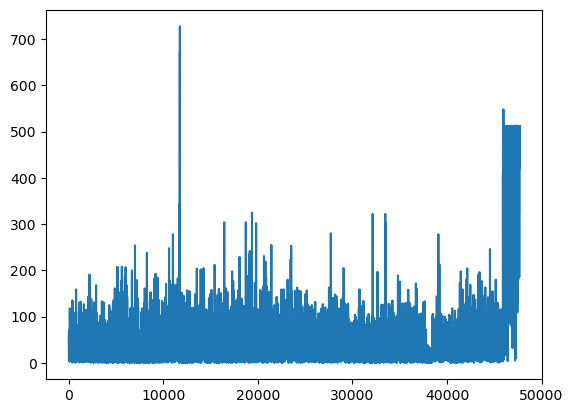

In [28]:
import matplotlib.pyplot as plt
plt.plot(all_lens)

In [31]:
all_data_list = all_books_data_list + all_youtube_data

In [36]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")

num_tokens_list = []
for ad in all_data_list:
    try:
        num_tokens_list.append(len(enc.encode(ad)))
    except Exception as e:
        # print(ad)
        print(e)

expected string or buffer


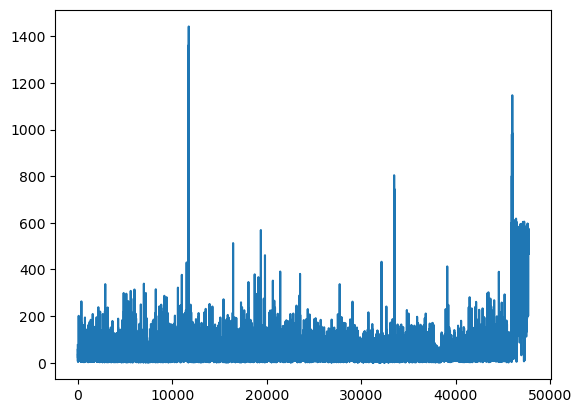

In [38]:
plt.plot(num_tokens_list)